# DISCLAIMER

# Data exploration and visualization


Our goal is to train a regression model to predict bitcoin price based on bitcoin network data. Before we begin trying out models we need to know more about our data. We do this X steps...

1.
2....


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

from scipy import stats

In [8]:
filename = "bitcoin_dataset_v2.csv"
bitcoin_data = pd.read_csv(filename, sep=",",skiprows=range(1,282),parse_dates=['Date'],infer_datetime_format=True) 
#Skip until 2010-08-16, i.e when price>0
nrOfSamples = len(bitcoin_data)
print(nrOfSamples)

2639


# 1. Preliminary exploration
We begin our analysis with a simple overview of the data set and its features

In [18]:
bitcoin_data

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-08-18 00:00:00,0.074000,3750900.0,2.775666e+05,2.067786e+02,1.000000,0.001973,0.0,1.000000,0.000000,...,18.583081,1.305501,449.0,377.0,105185.0,377.0,377.0,5.282965e+04,35791.000000,2.649000e+03
1,2010-08-19 00:00:00,0.068800,3757900.0,2.585435e+05,5.187840e+01,1.000000,0.000715,0.0,1.000000,0.000000,...,50.886220,1.308696,395.0,368.0,105553.0,368.0,368.0,3.202742e+04,13756.000000,9.460000e+02
2,2010-08-20 00:00:00,0.066700,3766250.0,2.512089e+05,2.939825e+02,1.000000,0.000649,0.0,1.000000,0.000000,...,39.493369,1.399359,433.0,398.0,105951.0,398.0,398.0,3.664752e+04,21143.000000,1.410000e+03
3,2010-08-21 00:00:00,0.066899,3775450.0,2.525738e+05,7.310702e+02,1.000000,0.000528,0.0,1.000000,0.000000,...,52.705028,1.768594,396.0,348.0,106299.0,348.0,348.0,3.379041e+04,17456.000000,1.168000e+03
4,2010-08-22 00:00:00,0.066400,3785400.0,2.513506e+05,1.118938e+03,1.000000,0.000491,0.0,1.000000,0.000000,...,33.198282,1.887657,358.0,350.0,106649.0,350.0,350.0,4.581046e+04,29971.000000,1.990000e+03
5,2010-08-23 00:00:00,0.066000,3796250.0,2.505525e+05,3.008243e+02,1.000000,0.000495,0.0,1.000000,0.000000,...,95.802102,1.840874,431.0,389.0,107038.0,389.0,389.0,2.927446e+04,11325.000000,7.470000e+02
6,2010-08-24 00:00:00,0.066889,3806500.0,2.546130e+05,4.698232e+02,1.000000,0.000434,0.0,1.000000,0.000000,...,88.064623,2.034458,393.0,337.0,107375.0,337.0,337.0,2.862403e+04,11639.000000,7.790000e+02
7,2010-08-25 00:00:00,0.066500,3817850.0,2.538870e+05,2.960216e+02,1.000000,0.000772,0.0,1.000000,0.000000,...,143.179364,1.905997,414.0,396.0,107771.0,396.0,396.0,2.423476e+04,7927.000000,5.270000e+02
8,2010-08-26 00:00:00,0.066499,3828250.0,2.545748e+05,2.709007e+02,1.000000,0.000499,0.0,2.000000,0.000000,...,56.502301,1.849170,391.0,374.0,108145.0,374.0,374.0,3.053445e+04,18406.000000,1.224000e+03
9,2010-08-27 00:00:00,0.065000,3837150.0,2.494148e+05,5.405982e+02,1.000000,0.000549,0.0,2.000000,0.000000,...,90.203861,1.987973,316.0,291.0,108436.0,291.0,291.0,2.153439e+04,9867.000000,6.410000e+02



Available features:

|Feature|Importance|
|-|-| 
|Date|Low|  
|btc_market_price|Dependent variable|  
|btc_total_bitcoins|Medium| 
|btc_market_cap|*None*, Function of price and total bitcoins |
|btc_trade_volume (*missing a lot of values* )|High|
|btc_blocks_size|Medium|
|btc_avg_block_size|Low| 
|btc_n_orphaned_blocks| ?|
|btc_n_transactions_per_block|?|
|btc_median_confirmation_time|Low|
|btc_hash_rate|Medium|
|btc_difficulty|Medium|
|btc_miners_revenue|Medium|
|btc_transaction_fees|Medium| 
|btc_cost_per_transaction_percent|Redundant|
|btc_cost_per_transaction|Medium| 
|btc_n_unique_addresses|Low|
|btc_n_transactions|Medium| 
|btc_n_transactions_total|Maybe Redundant| 
|btc_n_transactions_excluding_popular|?| 
|btc_n_transactions_excluding_chains_longer_than_100|?|
|btc_output_volume|?, Function of price and transaction volume|
|btc_estimated_transaction_volume|?|
|btc_estimated_transaction_volume_usd|?|


All features are numerical, except for 'Date'.

__Missing data__  
Continuing on from here we explore if there is missing data 

In [19]:
#missing data
total = bitcoin_data.isnull().sum().sort_values(ascending=False)
percent = (bitcoin_data.isnull().sum()/bitcoin_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
btc_trade_volume,21,0.007958
btc_estimated_transaction_volume_usd,0,0.000000
btc_estimated_transaction_volume,0,0.000000
btc_market_price,0,0.000000
btc_total_bitcoins,0,0.000000
btc_market_cap,0,0.000000
btc_blocks_size,0,0.000000
btc_avg_block_size,0,0.000000
btc_n_orphaned_blocks,0,0.000000
btc_n_transactions_per_block,0,0.000000


Merely 21 samples are incomplete, unfortunately they're missing the trade volume feature, which we categorized as having a High importance in predicting market price.

We can here chose if we'd like to drop or fill the gaps of the 21 samples. We chose to drop the 21 samples, since they constitute less than 0.8% of the samples.

In [20]:
#Drop data and check that everything went all right
bitcoin_data = bitcoin_data.dropna()
newNrOfSamples = len(bitcoin_data)
print("We dropped:",nrOfSamples-newNrOfSamples,"samples")

We dropped: 21 samples


# 2. Univariate analysis  
With a complete dataset we begin exploring our dependent variable.

Naturally, since this is a time series problem, we begin with plotting price against time. From 2010-08-16 until today.

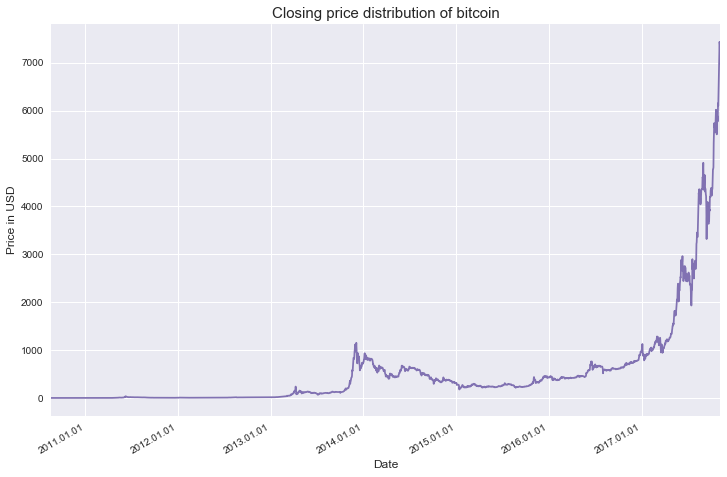

In [21]:
color = sns.color_palette()
import matplotlib.dates as mdates
bitcoin_data['Date_mpl'] = bitcoin_data['Date'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(12,8))
sns.tsplot(bitcoin_data['btc_market_price'], time=bitcoin_data.Date_mpl.values, color=color[3], ax=ax)

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of bitcoin", fontsize=15)
plt.show()


In [14]:
bitcoin_data['Date_mpl']

0       734002.0
1       734003.0
2       734004.0
3       734005.0
4       734006.0
5       734007.0
6       734008.0
7       734009.0
8       734010.0
9       734011.0
10      734012.0
11      734013.0
12      734014.0
13      734015.0
14      734016.0
15      734017.0
16      734018.0
17      734019.0
18      734020.0
19      734021.0
20      734022.0
21      734023.0
22      734024.0
23      734025.0
24      734026.0
25      734027.0
26      734028.0
27      734029.0
28      734030.0
29      734031.0
          ...   
2609    736611.0
2610    736612.0
2611    736613.0
2612    736614.0
2613    736615.0
2614    736616.0
2615    736617.0
2616    736618.0
2617    736619.0
2618    736620.0
2619    736621.0
2620    736622.0
2621    736623.0
2622    736624.0
2623    736625.0
2624    736626.0
2625    736627.0
2626    736628.0
2627    736629.0
2628    736630.0
2629    736631.0
2630    736632.0
2631    736633.0
2632    736634.0
2633    736635.0
2634    736636.0
2635    736637.0
2636    736638

In [22]:
bitcoin_data["btc_market_price"].describe()

count    2618.000000
mean      523.857692
std       973.530339
min         0.060900
25%        10.841622
50%       241.135000
75%       588.515318
max      7437.543317
Name: btc_market_price, dtype: float64

The description tells us that 75% of samples are with price less or equal to 588.41 USD. 

One problem with this is that recent data lies in the highest percentile and there are no indicators that price fall below 588 USD in any near future. Therefore any predective model need to give more weight to recent samples

(IS THIS A PROBLEM???)  

__Graphical representation__  
We can visualize this issue by an analysis of the empirical density.

Skewness tells us to what degree our data is assymetric and kurtosis tells us more about how the distribution about our data looks like.

Finally we plot the probability distribution and the normal probability plot.

In [23]:
#skewness and kurtosis
print("Skewness: %f" % bitcoin_data['btc_market_price'].skew())
print("Kurtosis: %f" % bitcoin_data['btc_market_price'].kurt())

Skewness: 3.688019
Kurtosis: 15.413360


Positive skewness and high kurtosis tells us two things, that our data is assymetric with a long right tail.  

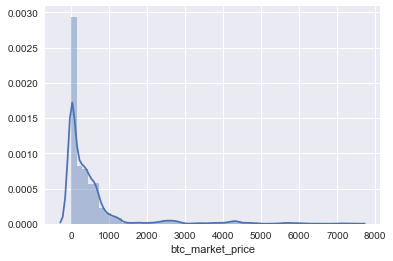

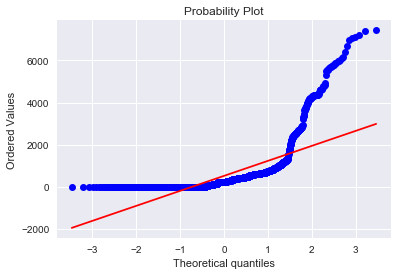

In [24]:
#histogram
sns.distplot(bitcoin_data['btc_market_price'],label="distribution")
fig = plt.figure()

res = stats.probplot(bitcoin_data['btc_market_price'], plot=plt)

The probability plot is almost unneccesary in telling us that Price data is far from being normal distributed

# 3. Bivariate analysis
## 3.1 Subjective analysis

We begin with subjective bivariate analysis

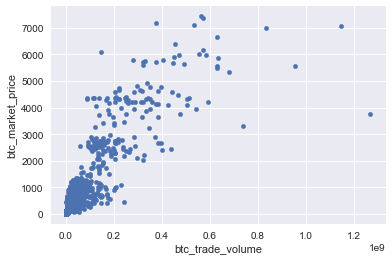

In [25]:
var = "btc_trade_volume"
label = "btc_market_price"
data = pd.concat([bitcoin_data[var],bitcoin_data[label]],axis=1)
data.plot.scatter(x=var,y=label)

Plotting trade volume against price confirms a fundamental assumpution: They don't have a kausality...

## 3.2 Objective analysis
We begin the objective part of our bivariate analysis by calculating the pearson-coeffiecient between all features and plotting the values through a heatmap

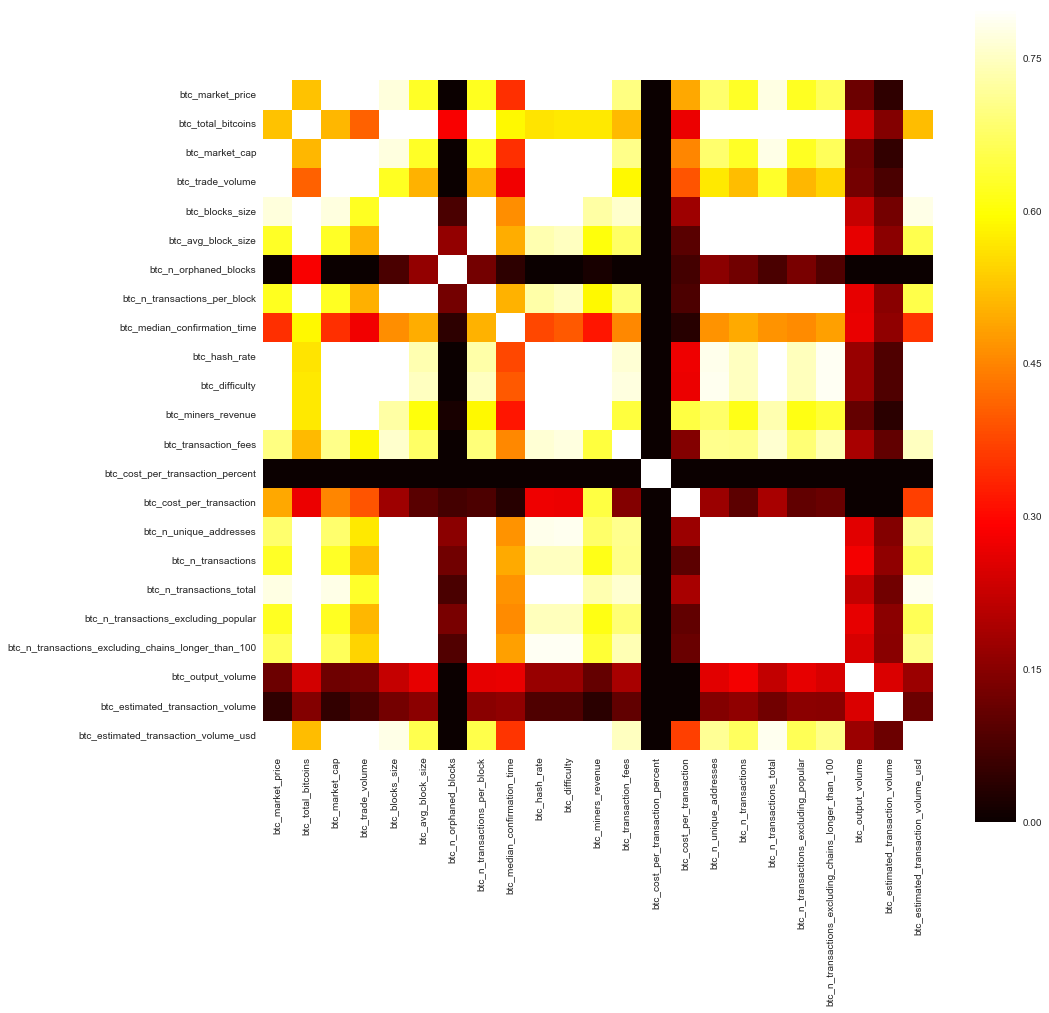

In [26]:
#correlation matrix
corrmat = bitcoin_data.corr()
f, ax = plt.subplots(figsize=(15, 15))
#color = sns.palplot(sns.color_palette("inferno", n_colors=7))
sns.heatmap(corrmat,cmap="hot",vmin=0,vmax=.8, square=True)

The heatmap shows us that there are multiple cases of multicolinearity between features. This can cause problems for our regression model and therefore needs to be handled.

The following features are to be dropped:  
"btc_market_cap", as stated previously it's a direct   function of price and total amount of bitcoins  
"btc_avg_block_size", just an average of block size  
"btc_difficulty", as it's calculated based on hashrate  
"btc_cost_per_transaction_percent", as it's closely related to cost per transaction  
"btc_n_transactions_total", as it's an aggregate of all daily transactions  
"btc_output_volume" and "btc_estimated_transaction_volume_usd", as it's a function of transaction and price  

and also.. "Date"

In [27]:
drop_cols=["Date","btc_market_cap","btc_avg_block_size","btc_difficulty","btc_cost_per_transaction_percent",
           "btc_n_transactions_total","btc_output_volume"]

bitcoin_data = bitcoin_data.drop(drop_cols,axis=1)

__Price correlation matrix__  
Next we want to understand which features are most correlated with our dependent variable price.

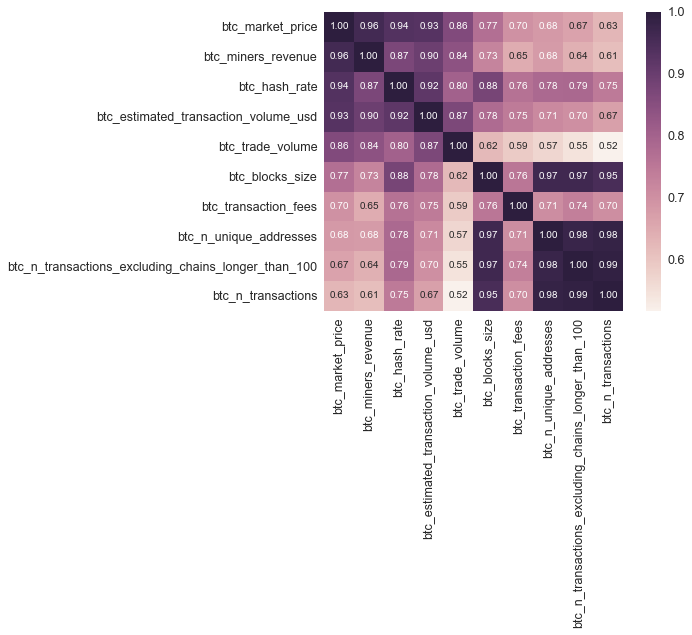

In [28]:
#Price correlation matrix
k = 10 #number of variables for heatmap
corrmat = bitcoin_data.corr()
cols = corrmat.nlargest(k, 'btc_market_price')['btc_market_price'].index
cm = np.corrcoef(bitcoin_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

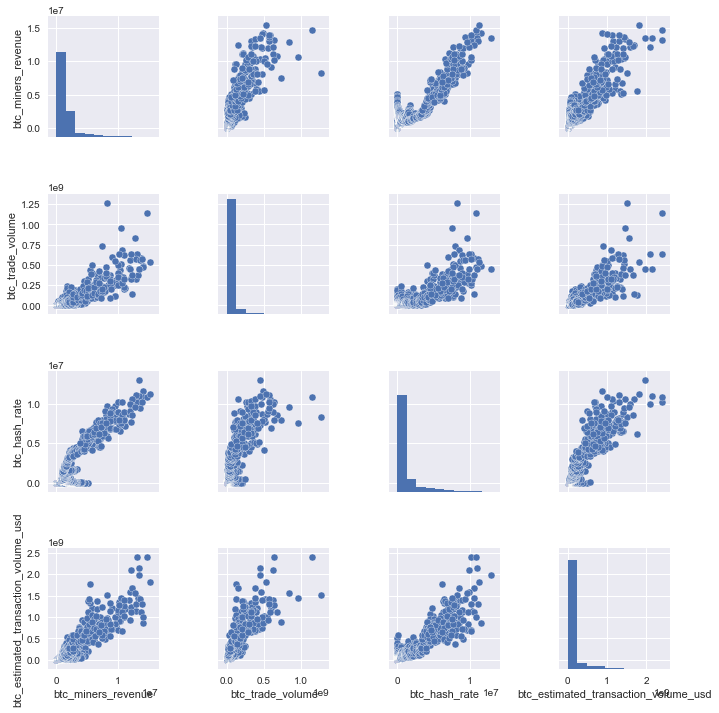

In [29]:
#scatterplot
sns.set()
cols = ["btc_miners_revenue","btc_trade_volume","btc_hash_rate","btc_estimated_transaction_volume_usd"]
sns.pairplot(bitcoin_data[cols], size = 2.5)
plt.show();

# 4. Pre processing 